In [36]:
# Import Libraries
import yfinance as yf
import matplotlib.pyplot as plt

%matplotlib inline

In [37]:
# Get the data for the stock ^IBEX
ibex35 = yf.download('^IBEX')

[*********************100%%**********************]  1 of 1 completed


In [38]:
# Check DataFrame
ibex35.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1993-07-12,2826.800049,2826.800049,2814.600098,2826.399902,2826.396973,0
1993-07-13,2826.399902,2843.699951,2820.899902,2843.399902,2843.396973,0
1993-07-14,2845.399902,2858.399902,2845.399902,2851.100098,2851.097168,0
1993-07-15,2848.699951,2848.699951,2835.000000,2843.699951,2843.697021,0
1993-07-16,2843.699951,2848.000000,2818.800049,2830.500000,2830.497070,0
1993-07-19,2825.199951,2825.199951,2817.399902,2822.199951,2822.197021,0
1993-07-20,2829.500000,2840.500000,2829.500000,2840.000000,2839.997070,0
1993-07-21,2832.300049,2832.300049,2819.000000,2830.500000,2830.497070,0
1993-07-22,2830.500000,2849.899902,2814.100098,2838.899902,2838.896973,0


In [39]:
# Check DataFrame
ibex35.tail(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-09-25,9468.500000,9523.900391,9337.700195,9386.000000,9386.000000,107471700
2023-09-26,9327.500000,9405.400391,9307.099609,9366.900391,9366.900391,121930200
2023-09-27,9366.000000,9420.900391,9311.799805,9331.900391,9331.900391,106336400
2023-09-28,9344.099609,9442.299805,9311.500000,9426.799805,9426.799805,171533200
2023-09-29,9458.500000,9508.299805,9423.000000,9428.000000,9428.000000,139259800
2023-10-02,9447.700195,9495.099609,9299.400391,9319.000000,9319.000000,157515300
2023-10-03,9284.599609,9369.599609,9164.000000,9165.500000,9165.500000,142881400
2023-10-04,9137.900391,9186.400391,9077.599609,9102.900391,9102.900391,139573600
2023-10-05,9160.200195,9193.299805,9096.000000,9157.700195,9157.700195,114922100


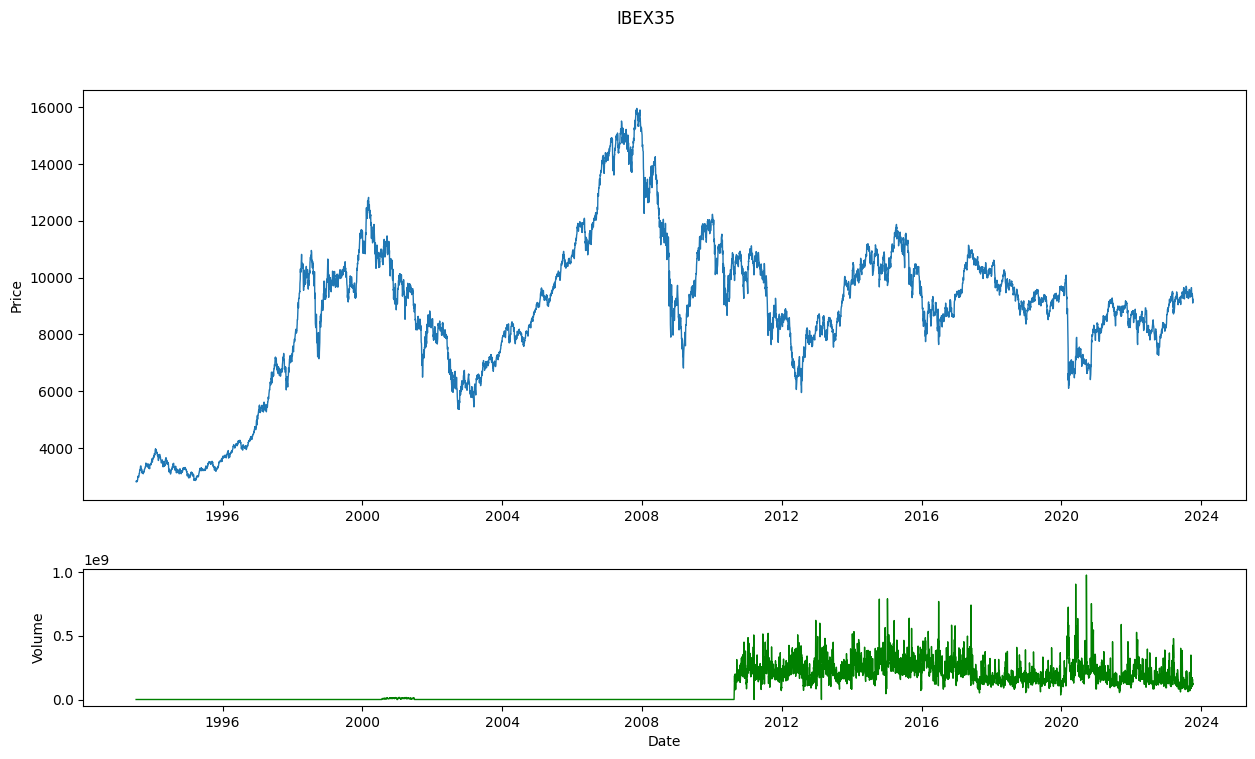

In [63]:
# Plot the close price of the ^IBEX
fig, axs = plt.subplots(2,1,gridspec_kw={'height_ratios': [3,1],'hspace':0.25},figsize=(15, 8))

fig.suptitle("IBEX35")
axs[0].set_ylabel('Price')
axs[0].plot(ibex35['Adj Close'],linewidth=1)

axs[1].set_ylabel("Volume")
axs[1].set_xlabel("Date")
axs[1].plot(ibex35['Volume'],linewidth=1,color='g')

plt.show()